# 1. 데이터 불러오기

In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# shape 확인

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
# y값 카테고리 확인

np.unique(train_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

category: 6


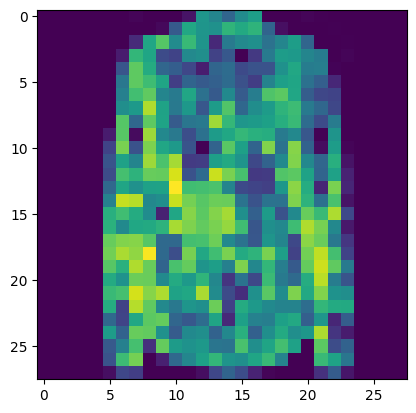

In [ ]:
# 시각화

id = random.randrange(0, 10000)
print(f"category: {test_y[id]}")
plt.imshow(test_x[id])
plt.show()

# 2. 전처리

In [ ]:
from keras.utils import to_categorical

In [ ]:
# 스케일링

max_n, min_n = train_x.max(), train_x.min()
print(f"before scaling: (max: {max_n}, min: {min_n})")

train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)
print(f"after scaling: (max: {train_x.max()}, min: {train_x.min()})")

before scaling: (max: 255, min: 0)
after scaling: (max: 1.0, min: 0.0)


In [ ]:
# 4D Tensor 변환

train_n, h, w = train_x.shape
test_n, _, _ = test_x.shape
print(f"before reshaping: train data {train_x.shape}, test data {test_x.shape}")

train_x = train_x.reshape(train_n, h, w, 1)
test_x = test_x.reshape(test_n, h, w, 1)
print(f"after reshaping: train data {train_x.shape}, test data {test_x.shape}")


before reshaping: train data (60000, 28, 28), test data (10000, 28, 28)
after reshaping: train data (60000, 28, 28, 1), test data (10000, 28, 28, 1)


In [ ]:
# y값 원핫인코딩

print(f"before one-hot encoding: train y {train_y.shape}, test y {test_y.shape}")

class_num = len(np.unique(train_y))
train_y = to_categorical(train_y, class_num)
test_y = to_categorical(test_y, class_num)
print(f"after one-hot encoding: train y {train_y.shape}, test y {test_y.shape}")

before one-hot encoding: train y (60000,), test y (10000,)
after one-hot encoding: train y (60000, 10), test y (10000, 10)


# 3. 모델링

In [ ]:
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten
from keras.callbacks import EarlyStopping

In [ ]:
clear_session()

model = Sequential()
model.add(Input(shape=(h, w, 1)))
model.add(Conv2D(filters = 32,
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = 'same',
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32,
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = 'same',
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2),
                    strides = (2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = 'same',
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = 'same',
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                        

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

In [ ]:
hist = model.fit(train_x, train_y, validation_split=0.2, epochs=100, verbose=1, callbacks=[es])

Epoch 1/100
1500/1500 [==============================] - 18s 7ms/step - loss: 0.4120 - accuracy: 0.8554 - val_loss: 0.3255 - val_accuracy: 0.8855
Epoch 2/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2635 - accuracy: 0.9045 - val_loss: 0.2893 - val_accuracy: 0.9010
Epoch 3/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2241 - accuracy: 0.9173 - val_loss: 0.2557 - val_accuracy: 0.9076
Epoch 4/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1974 - accuracy: 0.9275 - val_loss: 0.2518 - val_accuracy: 0.9143
Epoch 5/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1730 - accuracy: 0.9365 - val_loss: 0.2769 - val_accuracy: 0.9079
Epoch 6/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1552 - accuracy: 0.9421 - val_loss: 0.2309 - val_accuracy: 0.9209
Epoch 7/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1365 - accuracy: 0.9494 - val_loss: 0.2468 -

# 4. 성능 평가 및 시각화

In [ ]:
# 성능 평가

performance = model.evaluate(test_x, test_y, batch_size=100)
print(f"test loss = {performance[0]:.4f}, test accuracy = {performance[1]:.2f}")

100/100 [==============================] - 0s 5ms/step - loss: 0.2356 - accuracy: 0.9171
test loss = 0.2356, test accuracy = 0.92


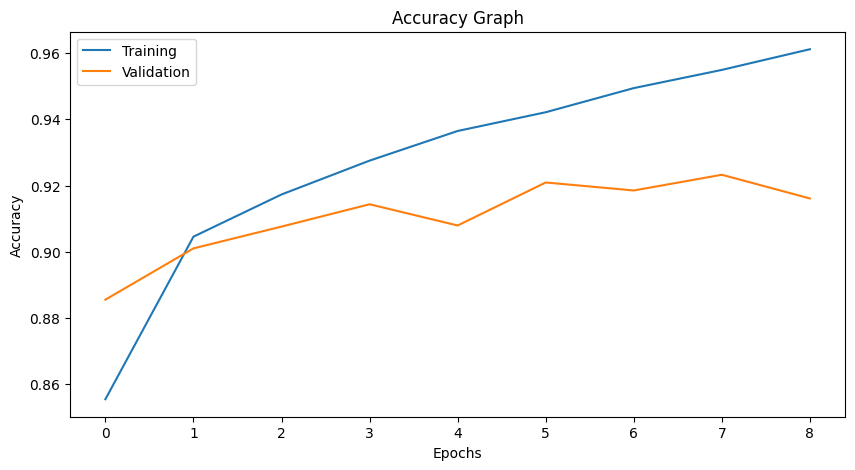

In [ ]:
# 시각화 (accuracy)

history = hist.history

plt.figure(figsize=(10,5))
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

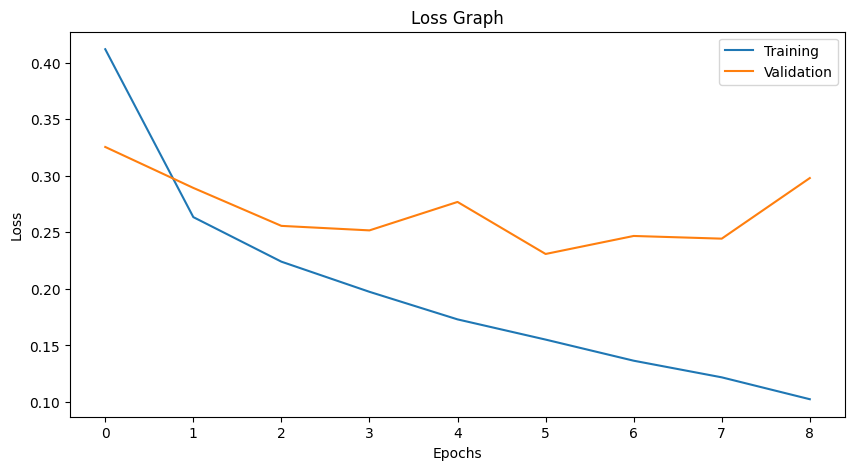

In [ ]:
# 시각화 (loss)

plt.figure(figsize=(10,5))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

In [ ]:
# 정확도
from sklearn.metrics import accuracy_score

y_pred = model.predict(test_x)
y_pred_single = y_pred.argmax(axis=1)
test_y_single = test_y.argmax(axis=1)

print(f"test accuracy : {accuracy_score(test_y_single, y_pred_single)}")

313/313 [==============================] - 1s 2ms/step
test accuracy : 0.9171


실제 값: 5
예측 값: 5


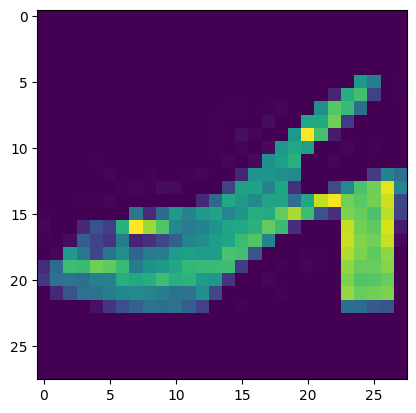

In [ ]:
# fashion_mnist 시각화

id = random.randrange(0, 10000)

print(f"실제 값: {test_y_single[id]}")
print(f"예측 값: {y_pred_single[id]}")
plt.imshow(test_x[id])
plt.show()